# Описание

Data scientist-ы придумали новый алгоритм, который позволяет курьерам запланировать свои последние заказы перед окончанием рабочего дня так, чтобы их маршрут доставки совпадал с маршрутом до дома. То есть, чтобы курьеры доставляли последние свои заказы за день как бы "по пути" домой. 

Вы вместе с командой решили раскатить A/B тест на две равные группы курьеров. Часть курьеров использует старый алгоритм без опции "по пути", другие видят в своем приложении эту опцию и могут ее выбрать. Ваша задача – проанализировать данные эксперимента и помочь бизнесу принять решение о раскатке новой фичи на всех курьеров.

# Описание данных

order_id - id заказа


delivery_time - время доставки в минутах


district - район доставки


experiment_group - экспериментальная группа

# Гипотезы для проверки

Нулевая гипотеза (H0): Разницы между средним временем доставки в тестовой и контрольной группе нет

Альтернативная гипотеза (H1): Разница между средним временем доставки в тестовой и контрольной группе есть

In [22]:
import numpy as np, scipy.stats as st
import statsmodels.stats.api as sms
import pandas as pd
import numpy as np
import scipy as scipy
import  as pg

import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-jafizova/statistics/lesson_4/experiment_lesson_4.csv')

In [3]:
df

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control
...,...,...,...,...
20191,14561,42.0,Suburb,test
20192,12015,32.0,Suburb,test
20193,20077,23.0,Purlieus,test
20194,14861,41.0,Central,test


Графики распределения по экспериментальным группам:

In [24]:
pg.normality(test['delivery_time'], method='normaltest')

,W,pval,normal
delivery_time,7.024157,0.029835,False


In [23]:
pg.normality(control['delivery_time'], method='normaltest')

,W,pval,normal
delivery_time,0.253498,0.880955,True


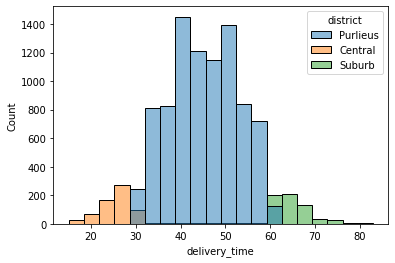

In [14]:
sns.histplot(data=df.query('experiment_group == "control"'), x='delivery_time', bins=20, hue='district')

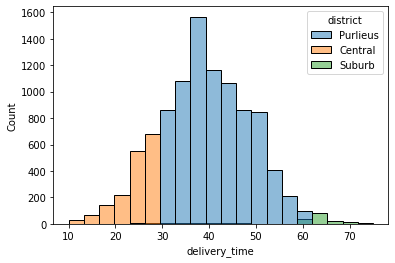

In [15]:
sns.histplot(data=df.query('experiment_group == "test"'), x='delivery_time', bins=20, hue='district')

In [28]:
np.std(control['delivery_time']).round(2)

9.99

In [29]:
np.std(test['delivery_time']).round(2)

9.88

На сколько по модулю отличается количество наблюдений в тесте и контроле?

In [16]:
control = df.query('experiment_group == "control"')

In [17]:
test = df.query('experiment_group == "test"')

In [19]:
control.order_id.value_counts().sum()

10092

In [20]:
test.order_id.value_counts().sum()

10104

In [4]:
#Ответ
10104 - 10092

12

Вывод: Хотя тест показывает, что значения в тестовой группе распределены ненормально, сама форма распределения не настолько сильно нарушает нормальность, чтобы об этом беспокоиться на таком размере выборки.

-----------------------------

На сколько процентов изменилось среднее время доставки в тестовой группе по сравнению с контрольной ? 

In [31]:
control['delivery_time'].mean()

45.065101070154576

In [32]:
test['delivery_time'].mean()

39.04681314330958

In [38]:
39.04681314330958 - 45.065101070154576

-6.018287926844998

In [39]:
-6.018287926844998/45.065101070154576

-0.13354653121660812

In [5]:
#Ответ
0.13354653121660812*100

13.354653121660812

Сам т-тест:

In [30]:
from scipy import stats
stats.ttest_ind(control['delivery_time'], test['delivery_time'])

Ttest_indResult(statistic=43.03582663183714, pvalue=0.0)

Среднее время доставки статистически значимо изменилось. Среднее время доставки в тесте меньше, чем в контроле. Поэтому стоит выкатывать эту фичу.